# 1. Dependências e ajuste no dataset

In [1]:
## Load dependencies.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from global_functions import dynamic_group
from global_functions import self_scatter
from scipy.stats import mstats

In [2]:
## Load main dataset.
df = pd.read_csv('bases-ajustadas/operacoes-integrado.csv')
pib = pd.read_csv('bases-auxiliares/pib-integrado.csv')
seeg = pd.read_csv('bases-auxiliares/SEEG-emissao-ajustado.csv')
idh = pd.read_csv('bases-auxiliares/idhm.csv')
caged = pd.read_csv('bases-auxiliares/CAGED-ajustado.csv')

In [3]:
## Define sns style.
sns.set_style("darkgrid")
sns.set_palette('deep')


# 2. Análise gráfica de tendências para sustentabilidade

## 2.1 - Ajuste dos dados

In [4]:
## Make a copy of main dataset
df_finem = df.copy(deep=True)

## SUbset BNDES FINEM
df_finem = df_finem[df_finem['produto'] == 'BNDES FINEM']

## Group by uf-ano-setor
gvars = ['uf', 'ano', 'setor_bndes']
rules = {'valor_desembolsado_ajustado': 'sum', 'emissao_co2': 'mean'}
df_finem = dynamic_group(df_finem, gvars, rules)


In [5]:
## Make set one dataset for each sector.
df_ind = df_finem.copy(deep=True)
df_agro = df_finem.copy(deep=True)

## Subset 'INDUSTRIA' and 'AGROPECUARIA'.
df_ind = df_ind[df_ind['setor_bndes'] == 'INDUSTRIA']
df_agro = df_agro[df_agro['setor_bndes'] == 'AGROPECUARIA']


In [6]:
## Make set one dataset for each sector.
seeg_ind = seeg.copy(deep=True)
seeg_agro = seeg.copy(deep=True)

## Subset 'INDUSTRIA' and 'AGROPECUARIA'.
seeg_ind = seeg_ind[seeg_ind['setor'] == 'INDUSTRIA']
seeg_agro = seeg_agro[seeg_agro['setor'] == 'AGROPECUARIA']


## 2.2 - Relação do desembolso BNDES FINEM com maiores estados emissores de co2

Vamos analisar a relação dos desembolsos do BNDES FINEM para Indústria e Agropecuária com a evolução de emissao de co_2 dessas áreas

### 2.2.1 - TOP3 emissao de co2 para a Indústria x desembolso

In [7]:
## Get top3 emissors.
gvars = ['uf']
rules = { 'emissao_co2': 'mean'}
uf_ind = dynamic_group(seeg_ind, gvars, rules).nlargest(
    3, 'emissao_co2')['uf']


In [8]:
## Subset dataset for those states.
top_ind = seeg_ind[seeg_ind['uf'].isin(uf_ind)]

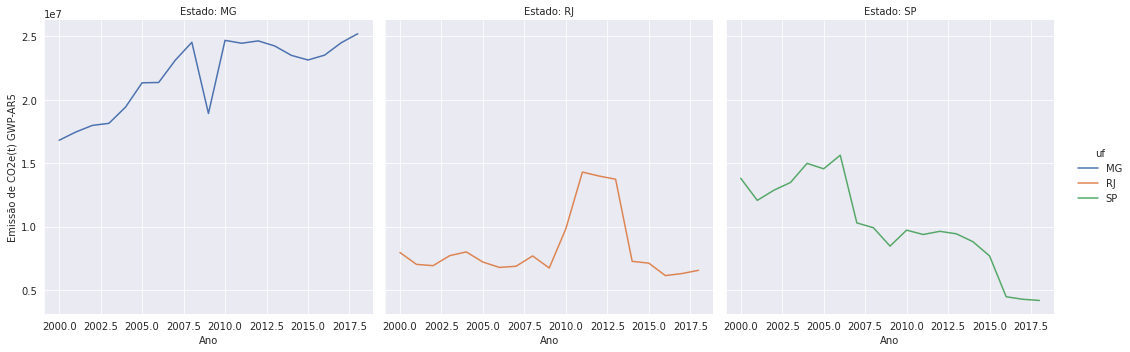

In [9]:
plot1 = sns.relplot(
    data=top_ind,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    row_order=['MG', 'RJ', 'SP']
)
(plot1.set_axis_labels('Ano', 'Emissão de CO2e(t) GWP-AR5')
 .set_titles('Estado: {col_name}')
 .tight_layout(w_pad=1))

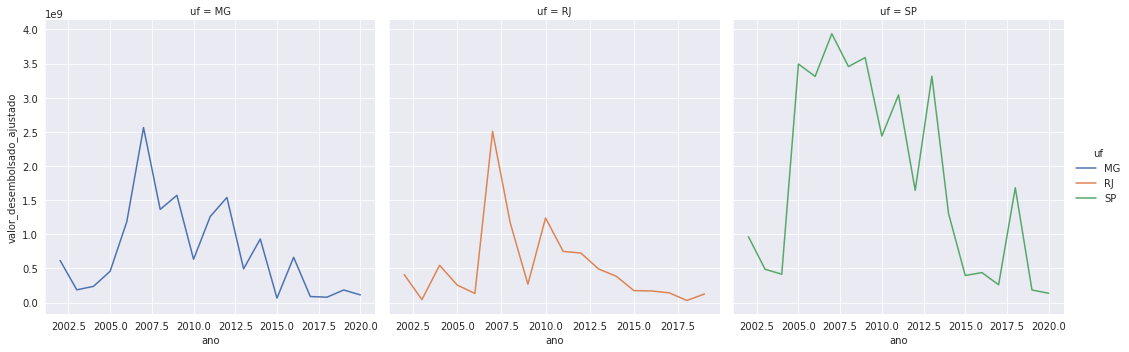

In [10]:
## Subset dataset for those states.
des_ind = df_ind[df_ind['uf'].isin(uf_ind)]

## plot.
plot2 = sns.relplot(
    data=des_ind,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


In [11]:
## Adjust for part 6

## Subset dataset.
ind_emis = seeg_ind[seeg_ind['uf'].isin(['SP', 'MG'])]
## Subset dataset for those states.
ind_emis_des = df_ind[df_ind['uf'].isin(['SP', 'MG'])]

### 2.2.2- TOP3 emissao de co2 para Agropecuaria x desembolso

In [74]:
## Get top3 emissors.
gvars = ['uf']
rules = {'emissao_co2': 'mean'}
uf_agro = dynamic_group(seeg_agro, gvars, rules).nlargest(
    3, 'emissao_co2')['uf']


In [75]:
## Subset dataset for those states.
top_agro = seeg_agro[seeg_agro['uf'].isin(uf_agro)]

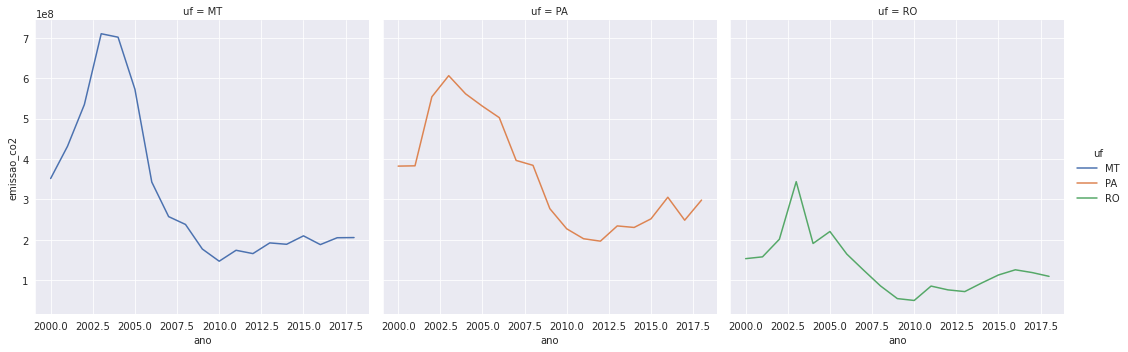

In [76]:
plot3 = sns.relplot(
    data=top_agro,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


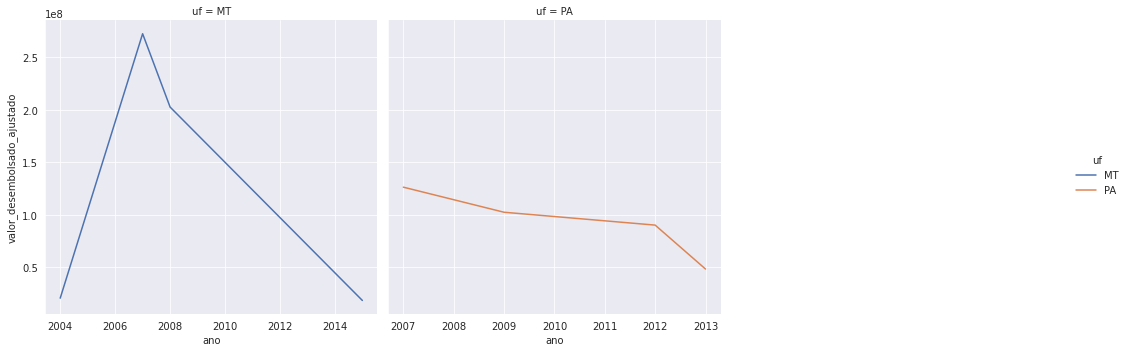

In [77]:
## Subset dataset for those states.
des_agro = df_agro[df_agro['uf'].isin(uf_agro)]

## Plot.
plot4 = sns.relplot(
    data=des_agro,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


In [78]:
## Adjust for part 6

## Subset dataset.
agro_emis = top_agro
## Subset dataset for those states.
agro_emis_des = des_agro


## 2.3 - Relação do desembolso BNDES FINEM com menores estados emissores de co2

Vamos analisar a relação dos desembolsos do BNDES FINEM para Indústria e Agropecuária com a evolução de emissao de co_2 dessas áreas.

### 2.3.1 - Menores emissores de co2 para a Indústria x desembolso

In [144]:
## Get smallest non zero emissors
gvars = ['uf']
rules = {'emissao_co2': 'mean'}
data = seeg_ind.loc[seeg_ind.ne(0).all(axis=1)]
uf_ind = dynamic_group(data, gvars, rules).nsmallest(
    3, 'emissao_co2')['uf']

In [145]:
## Subset dataset for those states.
small_ind = seeg_ind[seeg_ind['uf'].isin(uf_ind)]

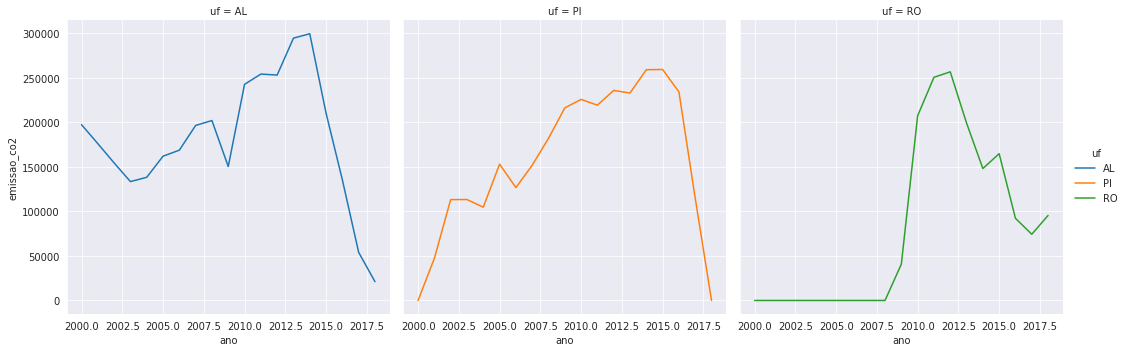

In [146]:
plot5 = sns.relplot(
    data=small_ind,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


In [147]:
## Subset dataset for those states.
des_ind = df_ind[df_ind['uf'].isin(uf_ind)]

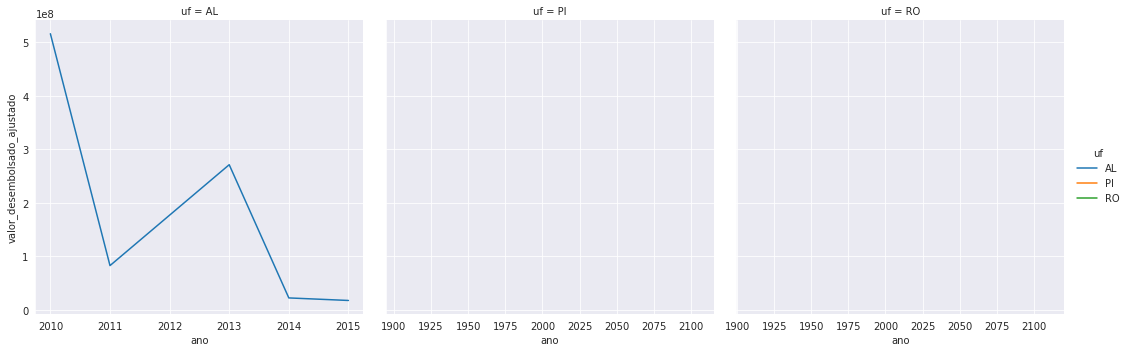

In [148]:
plot6 = sns.relplot(
    data=des_ind,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


### 2.3.2 - Menores emissores de co2 para a Agropecuária x desembolso

In [149]:
## Get smallest non zero emissors
gvars = ['uf']
rules = {'emissao_co2': 'mean'}
data = seeg_agro.loc[seeg_agro.ne(0).all(axis=1)]
uf_agro = dynamic_group(data, gvars, rules).nsmallest(
    3, 'emissao_co2')['uf']

In [150]:
## Subset dataset for those states.
small_agro = seeg_agro[seeg_agro['uf'].isin(uf_agro)]


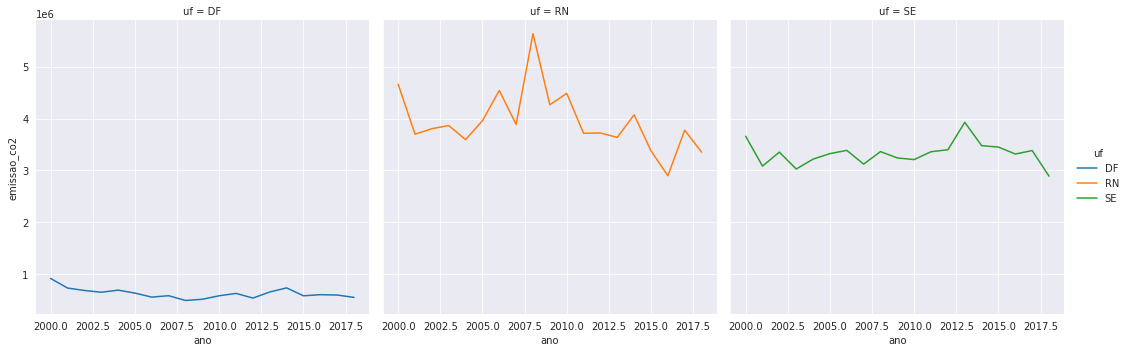

In [151]:
plot7 = sns.relplot(
    data=small_agro,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


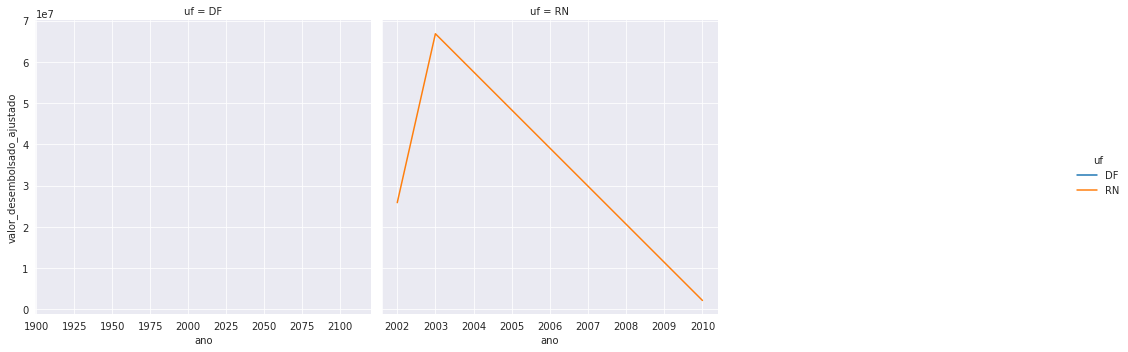

In [152]:
## Subset dataset for those states.
des_agro = df_agro[df_agro['uf'].isin(uf_agro)]

plot8 = sns.relplot(
    data=des_agro,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


# 3 - Análise gráfica de tendências econômicas: PIB

## 3.1 - Ajuste dos dados

In [87]:
## Define columns to drop.
drop_columns = ['data_da_contratacao', 'valor_contratado_reais', 'valor_desembolsado_reais',
                'fonte_de_recurso_desembolsos', 'custo_financeiro', 'modalidade_de_apoio', 'produto',
                'instrumento_financeiro', 'inovacao', 'area_operacional', 'mes', 'igpm']

df.drop(drop_columns, axis=1, inplace=True)

## Group.
df = df.groupby(['numero_do_contrato'], as_index=False).agg(
    {'cliente': ['first'], 'cnpj': ['first'], 'uf': ['first'], 'juros': ['mean'], 'prazo_carencia_meses': ['mean'],
     'prazo_amortizacao_meses': ['mean'], 'setor_bndes': ['first'], 'subsetor_bndes': ['first'],
     'porte_do_cliente': ['first'], 'natureza_do_cliente': ['first'], 'tipo_de_garantia': ['first'],
     'situacao_do_contrato': ['first'], 'valor_contratado_ajustado': ['sum'], 'valor_desembolsado_ajustado': ['sum'],
     'ano': ['first'], 'num_empregados': ['mean'], 'emissao_co2': ['mean'], 'pib': ['mean'], 'idhm': ['mean'], 'processos': ['mean']})

## Melt multi-index.
df.columns = list(map(''.join, df.columns.values))

## Rename columns.
df.columns = ['numero_do_contrato', 'cliente', 'cnpj', 'uf', 'juros',
              'prazo_carencia_meses', 'prazo_amortizacao_meses', 'setor_bndes', 'subsetor_bndes',
              'porte_do_cliente', 'natureza_do_cliente', 'tipo_de_garantia', 'situacao_do_contrato',
              'valor_contratado_ajustado', 'valor_desembolsado_ajustado', 'ano', 'num_empregados',
              'emissao_co2', 'pib', 'idh', 'processos']

## Round.
df['juros'] = df['juros'].round(2)


In [112]:
## Group by uf-ano-setor
gvars = ['uf', 'ano', 'setor_bndes']
rules = {'valor_desembolsado_ajustado': 'sum', 'pib': 'mean'}
df = dynamic_group(df, gvars, rules)

In [114]:
## Subset PIB dataset
pib_ind = pib[pib['setor'] == 'INDUSTRIA']
pib_agro = pib[pib['setor'] == 'AGROPECUARIA']

In [115]:
df_ind = df[df['setor_bndes'] == 'INDUSTRIA']
df_agro = df[df['setor_bndes'] == 'AGROPECUARIA']


## 3.2 - Relação dos desembolsos BNDES com maiores PIBs

### 3.2.1 - TOP3 pib para Indústria x desembolso

In [116]:
## Get top3 pib.
gvars = ['uf']
rules = {'pib': 'mean'}
uf_ind = dynamic_group(pib_ind, gvars, rules).nlargest(3, 'pib')['uf']


In [117]:
## Subset dataset for those states.
top_ind = pib_ind[pib_ind['uf'].isin(uf_ind)]


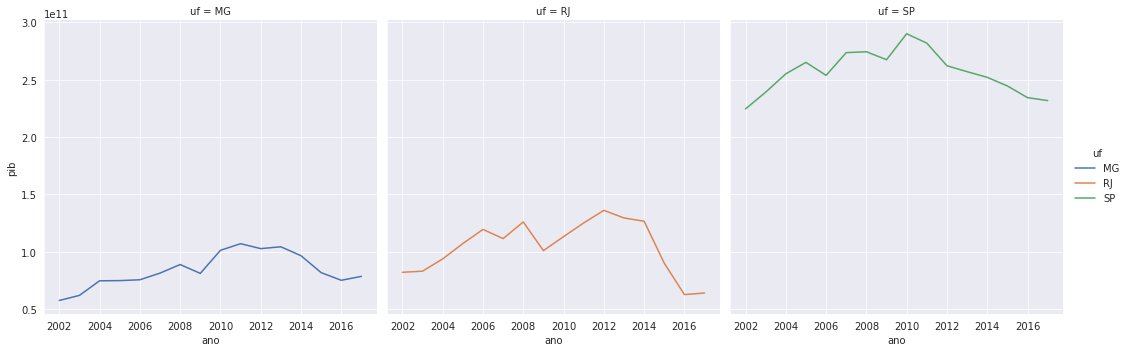

In [118]:
plot9 = sns.relplot(
    data=top_ind,
    x="ano", y="pib",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

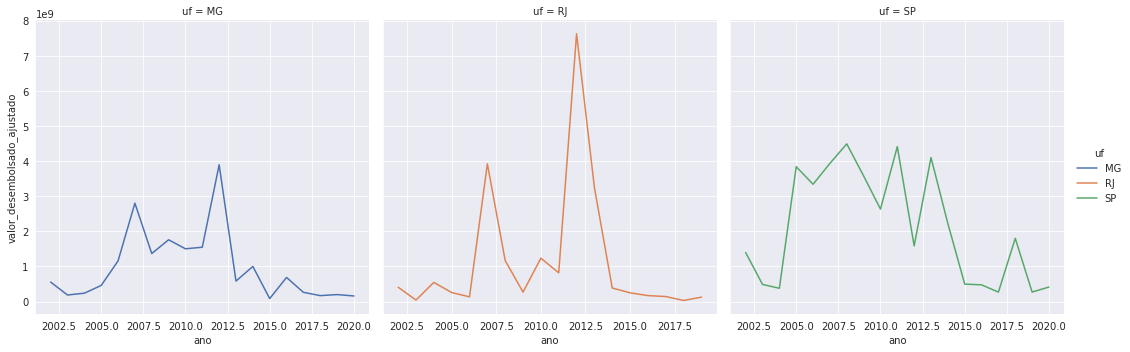

In [119]:
## Subset dataset for those states.
des_ind = df_ind[df_ind['uf'].isin(uf_ind)]

## Plot.
plot10 = sns.relplot(
    data=des_ind,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

In [121]:
## Adjust for part 6

## Subset dataset.
ind_pib = top_ind
## Subset dataset for those states.
ind_pib_des = des_ind


### 3.2.2 - TOP3 pib para Agropecuária x desembolso

In [149]:
## Get top3 pib.
gvars = ['uf']
rules = {'pib': 'mean'}
uf_agro = dynamic_group(pib_agro,
                       gvars, rules).nlargest(3, 'pib')['uf']

In [150]:
## Subset dataset for those states.
top_agro = pib_agro[pib_agro['uf'].isin(uf_agro)]

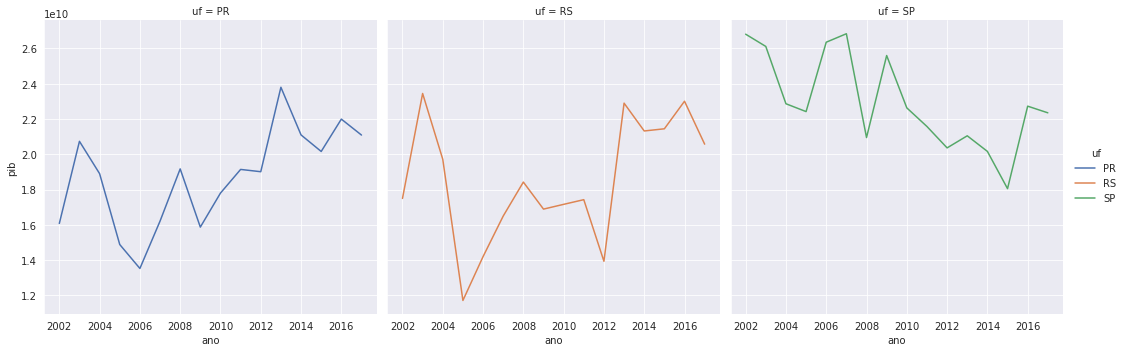

In [151]:
plot11 = sns.relplot(
    data=top_agro,
    x="ano", y="pib",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


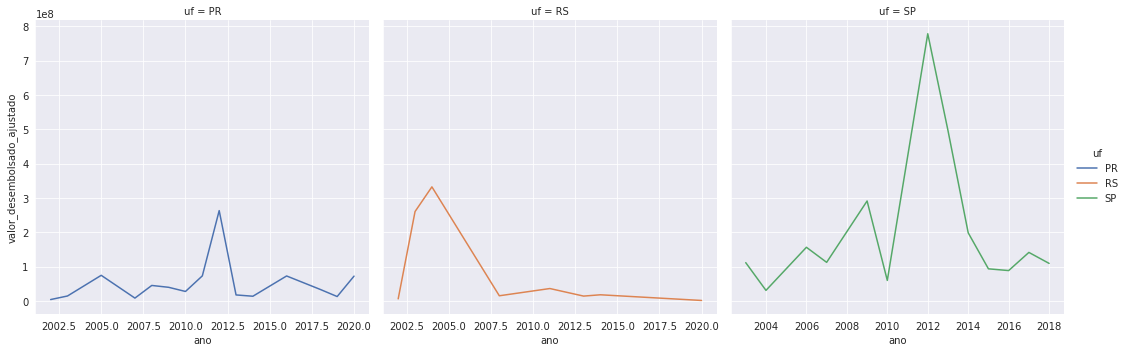

In [152]:
## Subset dataset for those states.
des_agro = df_agro[df_agro['uf'].isin(uf_agro)]

## Plot.
plot12 = sns.relplot(
    data=des_agro,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


In [153]:
## Adjust for part 6

## Subset dataset.
agro_pib = top_agro
## Subset dataset for those states.
agro_pib_des = des_agro


## 3.3 - Relação dos desembolsos BNDES com menores PIBs

### 3.3.1 Menores PIB's para a Industria

In [164]:
## Get smallest non zero pib's
gvars = ['uf']
rules = {'pib': 'mean'}
data = pib_ind.loc[pib_ind.ne(0).all(axis=1)]
uf_ind = dynamic_group(data, gvars, rules).nsmallest(
    3, 'pib')['uf']

In [165]:
## Subset dataset for those states.
small_ind = pib_ind[pib_ind['uf'].isin(uf_ind)]

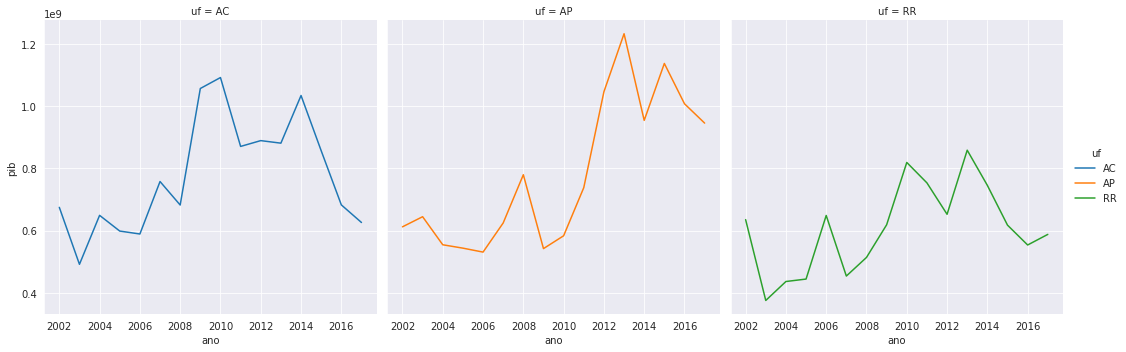

In [166]:
plot13 = sns.relplot(
    data=small_ind,
    x="ano", y="pib",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


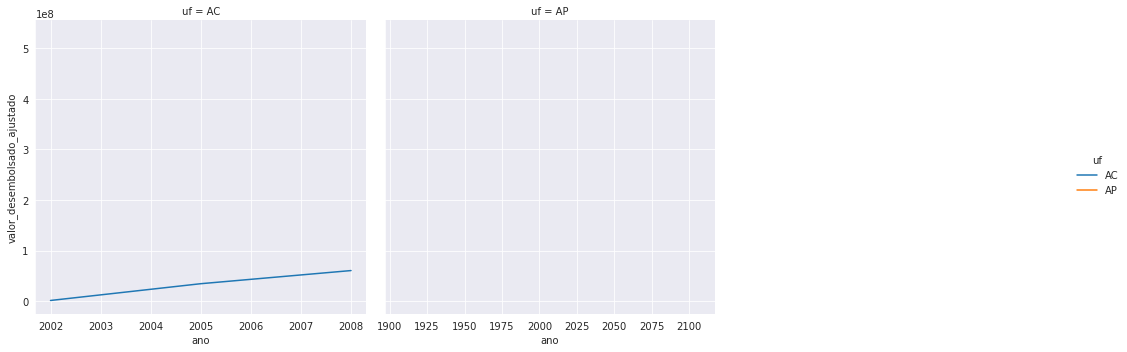

In [167]:
## Subset dataset for those states.
des_ind = df_ind[df_ind['uf'].isin(uf_ind)]

## Plot.
plot14 = sns.relplot(
    data=des_ind,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


### 3.3.2 Menores PIB's para a Agropecuaria

In [168]:
## Get smallest non zero pib's
gvars = ['uf']
rules = {'pib': 'mean'}
data = pib_agro.loc[pib_agro.ne(0).all(axis=1)]
uf_agro = dynamic_group(data, gvars, rules).nsmallest(
    3, 'pib')['uf']

In [169]:
## Subset dataset for those states.
small_agro = pib_agro[pib_agro['uf'].isin(uf_agro)]


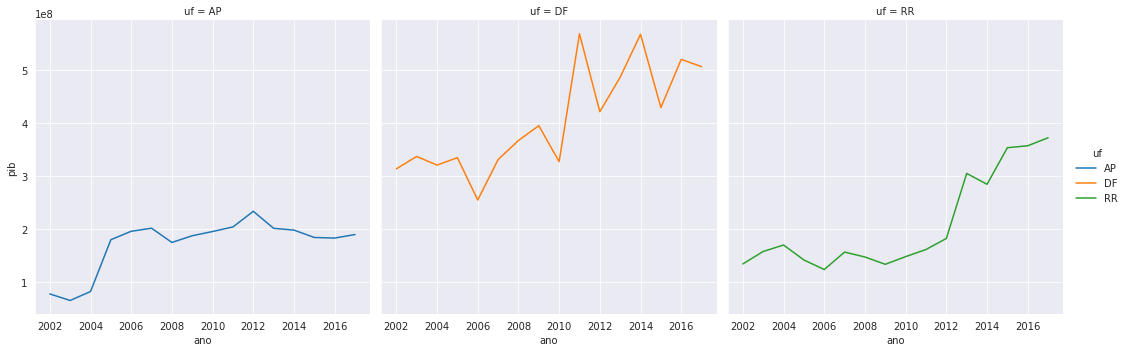

In [170]:
plot14 = sns.relplot(
    data=small_agro,
    x="ano", y="pib",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


Sem financiamentos para estes estados

# 4 - Análise gráfica de tendências econômicas: Empregos

## 4.1 - Ajuste dos dados

In [186]:
## Group CAGED data for sector
gvars = ['ano', 'uf', 'setor']
rules = {'num_empregados': 'sum'}
caged = dynamic_group(caged, gvars, rules)

In [187]:
## Subset Caged dataset
caged_ind = caged[caged['setor'] == 'INDUSTRIA']
caged_agro = caged[caged['setor'] == 'AGROPECUARIA']

## 4.2 - Relação dos desembolsos do BNDES com maior número de empregos

### 4.2.1 - TOP3 número de empregos para Indústria x desembolso

In [188]:
## Get top3.
gvars = ['uf']
rules = {'num_empregados': 'mean'}
uf_ind = dynamic_group(caged_ind, gvars, rules).nlargest(
    3, 'num_empregados')['uf']


In [189]:
## Subset dataset for those states.
top_ind = caged_ind[caged_ind['uf'].isin(uf_ind)]

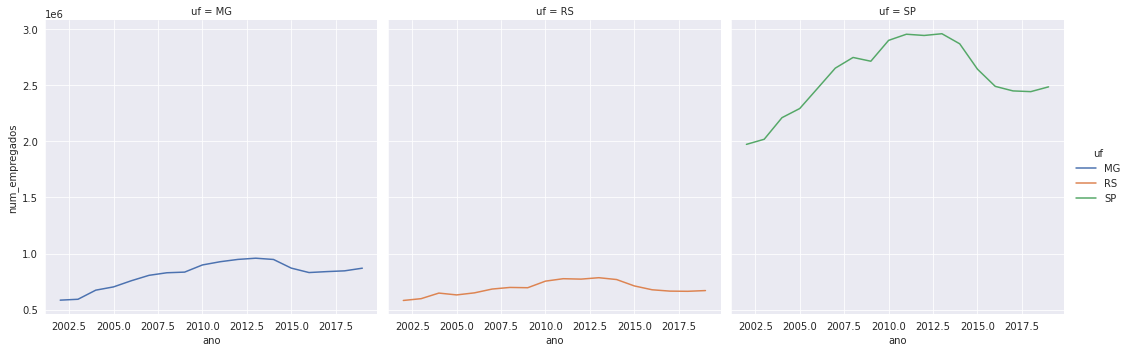

In [190]:
plot16 = sns.relplot(
    data=top_ind,
    x="ano", y="num_empregados",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

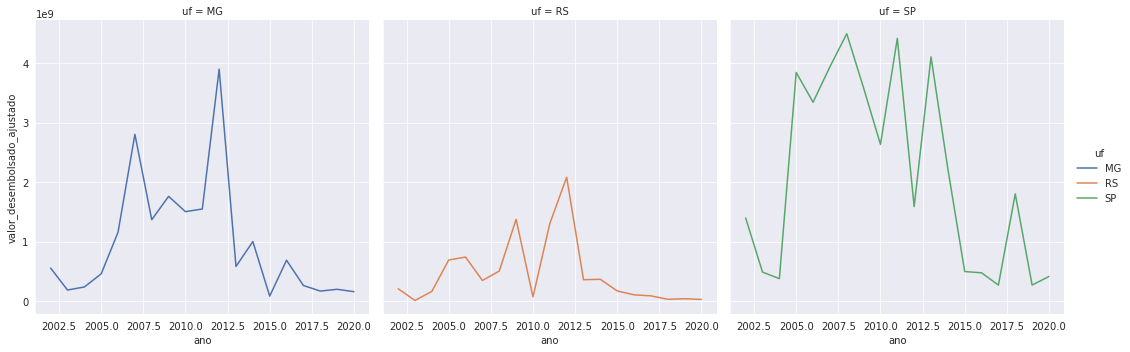

In [191]:
## Subset dataset for those states.
des_ind = df_ind[df_ind['uf'].isin(uf_ind)]

## Plot.
plot17 = sns.relplot(
    data=des_ind,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

In [192]:
## Adjust for part 6

## Subset dataset.
ind_emp = top_ind
## Subset dataset for those states.
ind_emp_des = des_ind


### 4.2.2 - TOP3 número de empregos para Agropecuária x desembolso

In [201]:
## Get top3.
gvars = ['uf']
rules = {'num_empregados': 'mean'}
uf_agro = dynamic_group(caged_agro, gvars, rules).nlargest(
    3, 'num_empregados')['uf']

In [202]:
## Subset dataset for those states.
top_agro = caged_agro[caged_agro['uf'].isin(uf_agro)]

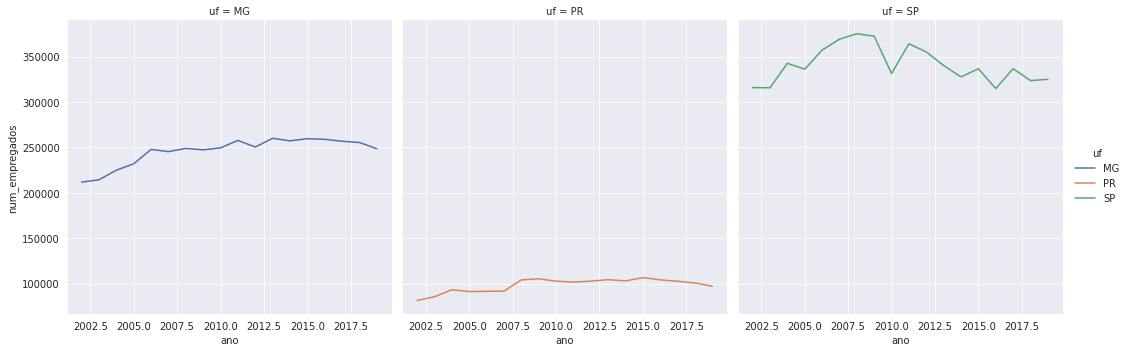

In [203]:
plot18 = sns.relplot(
    data=top_agro,
    x="ano", y="num_empregados",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

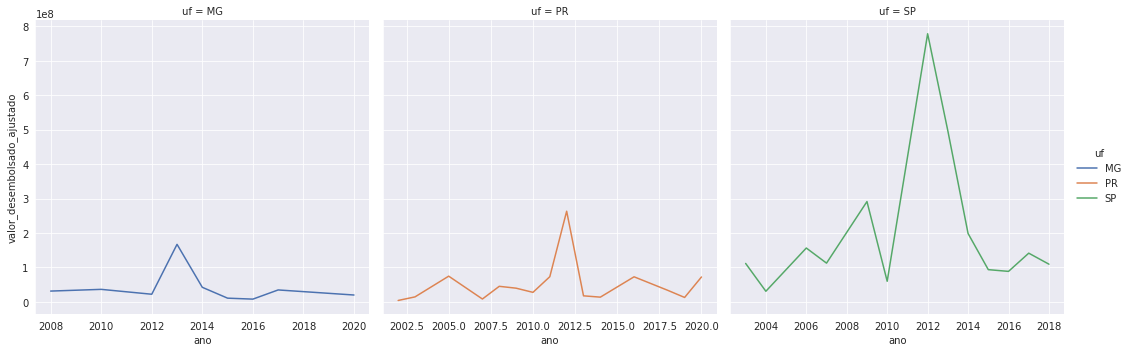

In [204]:
## Subset dataset for those states.
des_agro = df_agro[df_agro['uf'].isin(uf_agro)]

## Plot.
plot19 = sns.relplot(
    data=des_agro,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


In [205]:
## Adjust for part 6

## Subset dataset.
agro_emp = top_agro
## Subset dataset for those states.
agro_emp_des = des_agro


## 4.3 - Relação dos desembolsos do BNDES com menor número de empregos

### 4.3.1 Estados com menor número de empregados para a indústria x desembolso

In [183]:
## Get smallest non zero number of employees.
gvars = ['uf']
rules = {'num_empregados': 'mean'}
data = caged_ind.loc[caged_ind.ne(0).all(axis=1)]
uf_ind = dynamic_group(data, gvars, rules).nsmallest(
    3, 'num_empregados')['uf']


In [184]:
## Subset dataset for those states.
small_ind = caged_ind[caged_ind['uf'].isin(uf_ind)]

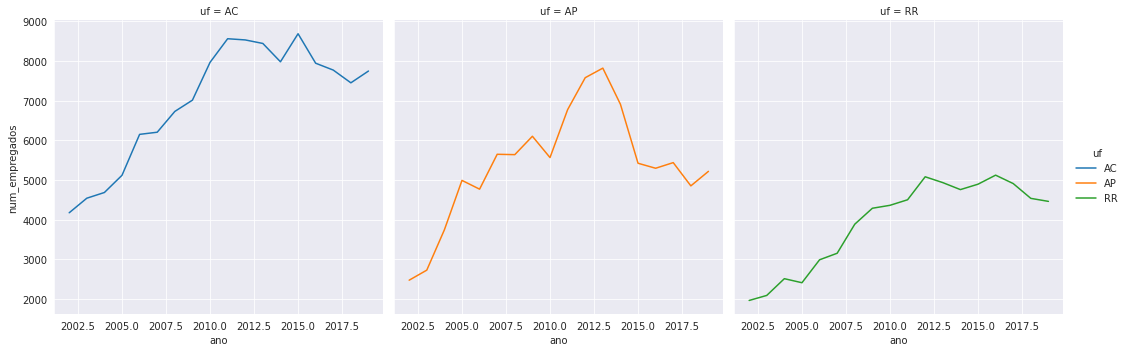

In [185]:
plot20 = sns.relplot(
    data=small_ind,
    x="ano", y="num_empregados",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


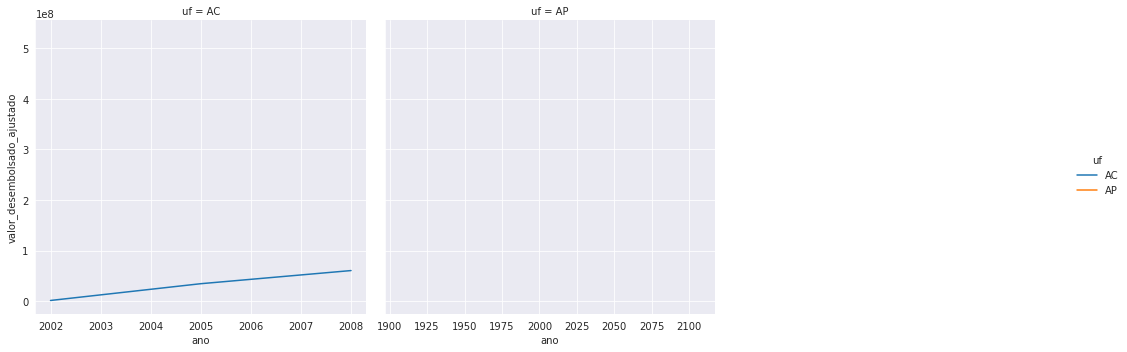

In [186]:
## Subset dataset for those states.
des_ind = df_ind[df_ind['uf'].isin(uf_ind)]

## Plot.
plot21 = sns.relplot(
    data=des_ind,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


### 4.3.2 Estados com menor número de empregados para a agropecuária


In [187]:
## Get smallest non zero number of employees.
gvars = ['uf']
rules = {'num_empregados': 'mean'}
data = caged_agro.loc[caged_agro.ne(0).all(axis=1)]
uf_agro = dynamic_group(data, gvars, rules).nsmallest(
    3, 'num_empregados')['uf']

In [188]:
## Subset dataset for those states.
small_agro = caged_agro[caged_agro['uf'].isin(uf_agro)]


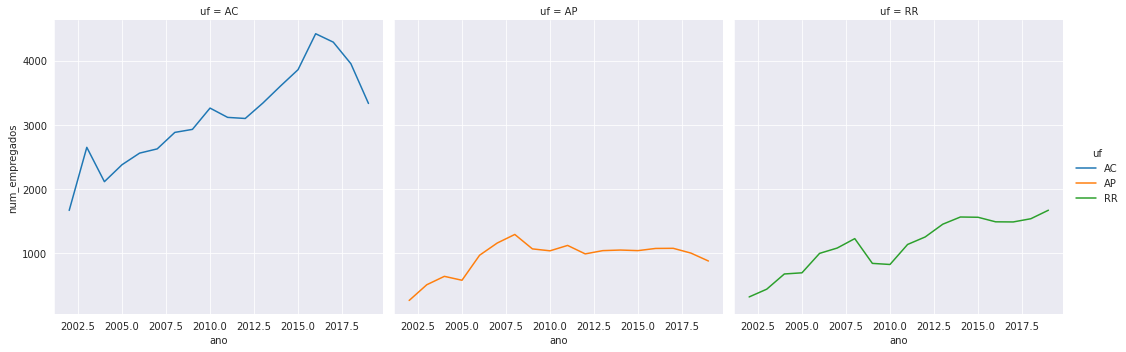

In [189]:
plot22 = sns.relplot(
    data=small_agro,
    x="ano", y="num_empregados",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

Sem desembolso para a agropecuária destes estados

# 5 - Análise gráfica de tendências econômicas: IDH

## 5.1 - TOP3 estados com maior IDH x desembolso

In [207]:
## Get top3.
gvars = ['uf']
rules = {'idhm': 'mean'}
uf_idh = dynamic_group(idh, gvars, rules).nlargest(
    3, 'idhm')['uf']

In [208]:
## Subset dataset for those states.
top_idh = idh[idh['uf'].isin(uf_idh)]

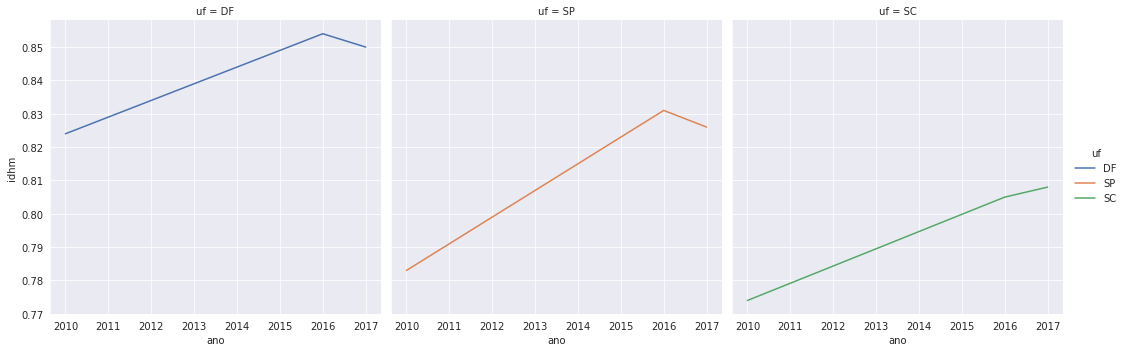

In [209]:
plot23 = sns.relplot(
    data=top_idh,
    x="ano", y="idhm",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

In [215]:
## Get top3.
gvars = ['uf', 'ano']
rules = {'valor_desembolsado_ajustado': 'sum'}
df = dynamic_group(df, gvars, rules)


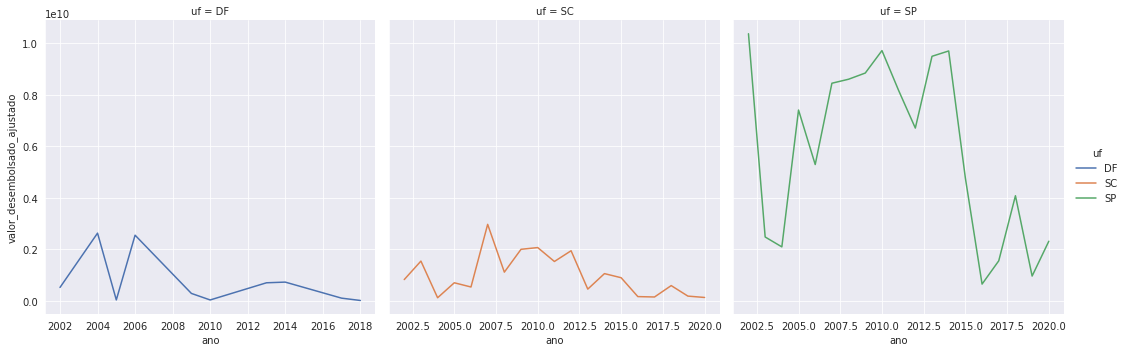

In [216]:
## Subset dataset for those states.
des_idh = df[df['uf'].isin(uf_idh)]

## Plot.
plot24 = sns.relplot(
    data=des_idh,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

In [224]:
## Adjust for part 6

## Subset dataset.
top_idh = top_idh
## Subset dataset for those states.
top_idh_des = des_idh.loc[des_idh['ano'] >= 2010]


## 5.2 - Estados com menor IDH x desembolso

In [228]:
## Get smallest non zero idh
gvars = ['uf']
rules = {'idhm': 'mean'}
data = idh.loc[idh.ne(0).all(axis=1)]
uf_idh = dynamic_group(data, gvars, rules).nsmallest(
    3, 'idhm')['uf']

In [229]:
## Subset dataset for those states.
small_idh = idh[idh['uf'].isin(uf_idh)]

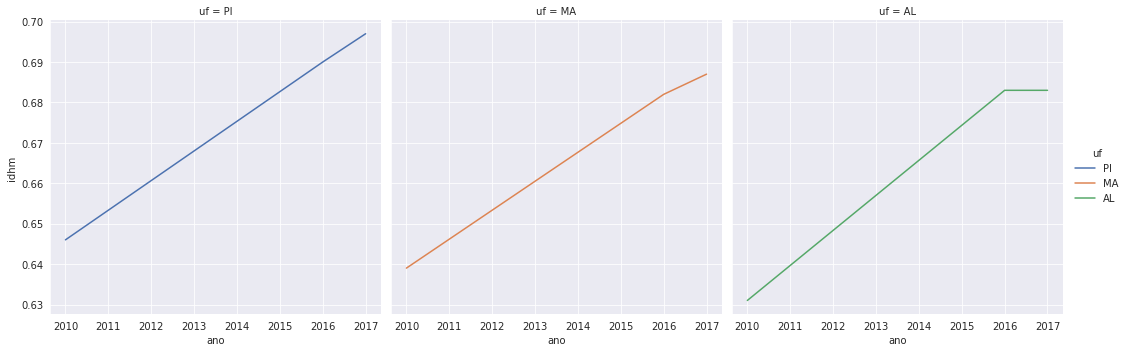

In [230]:
## Plot.
plot25 = sns.relplot(
    data=small_idh,
    x="ano", y="idhm",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


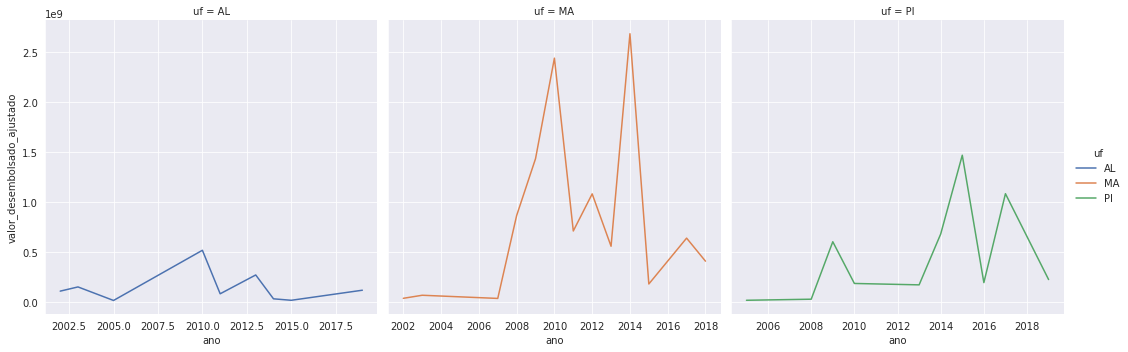

In [231]:
## Subset dataset for those states.
des_idh = df[df['uf'].isin(uf_idh)]

## Plot.
plot25 = sns.relplot(
    data=des_idh,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

In [232]:
## Adjust for part 6

## Subset dataset.
small_idh = small_idh
## Subset dataset for those states.
small_idh_des = des_idh.loc[des_idh['ano'] >= 2010]


# 6 - Ajuste de gráficos

Text(0.5, 0.98, 'Desembolso do BNDES - Maiores emissores de CO2e da Indústria')

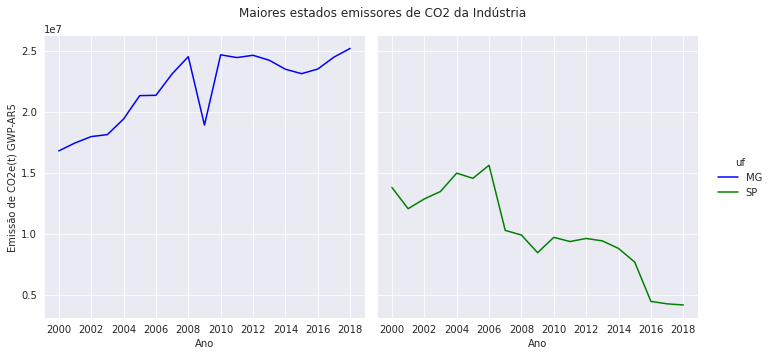

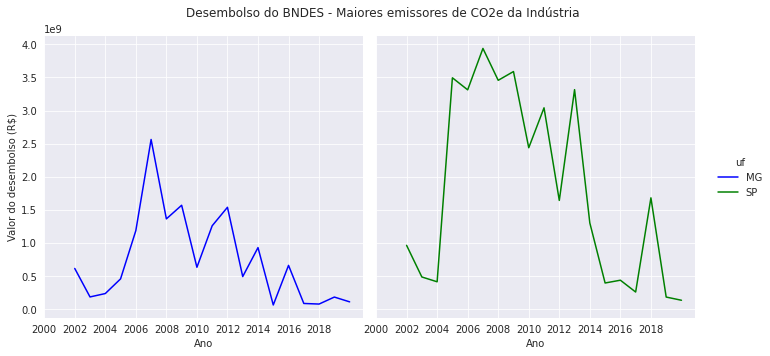

In [182]:
## Emissão e desembolso Indústria MG e SP
plot = sns.relplot(
    data=ind_emis,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=2,
    col_order=['MG', 'SP'], palette=['b','g']
)
(plot.set_axis_labels('Ano', 'Emissão de CO2e(t) GWP-AR5')
 .set_titles('')
 .tight_layout(w_pad=1))
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Maiores estados emissores de CO2 da Indústria')

plot = sns.relplot(
    data=ind_emis_des,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=2,
    col_order=['MG', 'SP'], palette=['b', 'g']
)
(plot.set_axis_labels('Ano', 'Valor do desembolso (R$)')
 .set_titles('')
 .tight_layout(w_pad=1))
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Desembolso do BNDES - Maiores emissores de CO2e da Indústria')


Text(0.5, 0.98, 'Desembolso do BNDES - Maiores emissores de CO2e da Agropecuária')

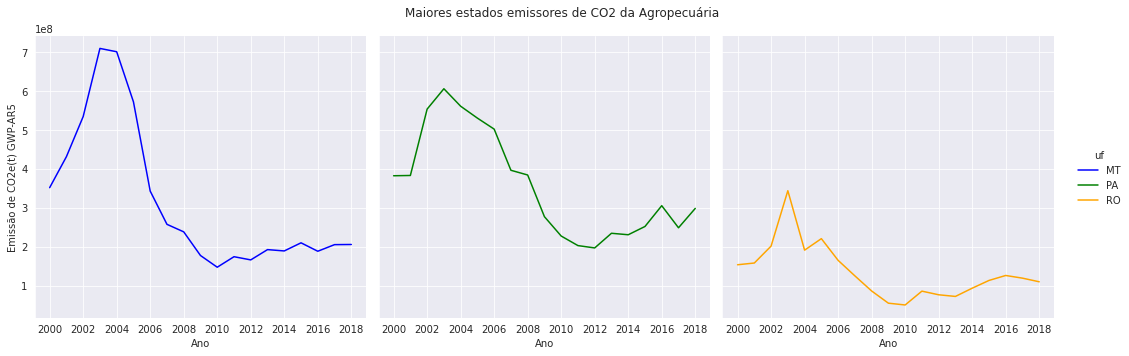

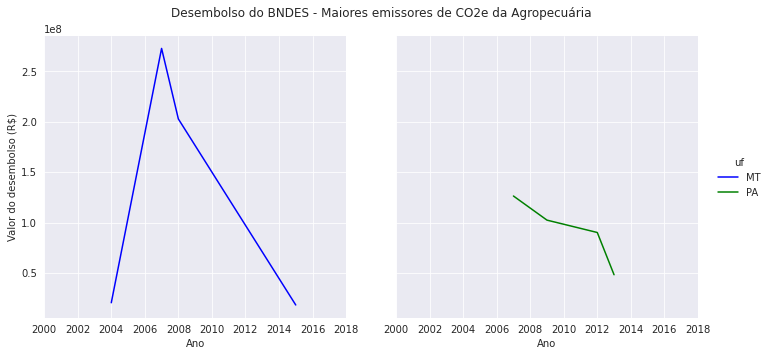

In [178]:
# Emissão e desembolso Agro MT, PA e RO
plot = sns.relplot(
    data=agro_emis,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    row_order=['MT', 'PA', 'RO'], palette=['b', 'g', 'orange']
)
(plot.set_axis_labels('Ano', 'Emissão de CO2e(t) GWP-AR5')
 .set_titles('Estado: {col_name}')
 .tight_layout(w_pad=1))
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.set_titles('')
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Maiores estados emissores de CO2 da Agropecuária')

plot = sns.relplot(
    data=agro_emis_des,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=2,
    row_order=['MT', 'PA'], palette=['b', 'g']
)
(plot.set_axis_labels('Ano', 'Valor do desembolso (R$)')
 .set_titles('Estado: {col_name}')
 .tight_layout(w_pad=5))
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.set_titles('')
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Desembolso do BNDES - Maiores emissores de CO2e da Agropecuária')


Text(0.5, 0.98, 'Desembolso BNDES - Estados com maior PIB da Indústria')

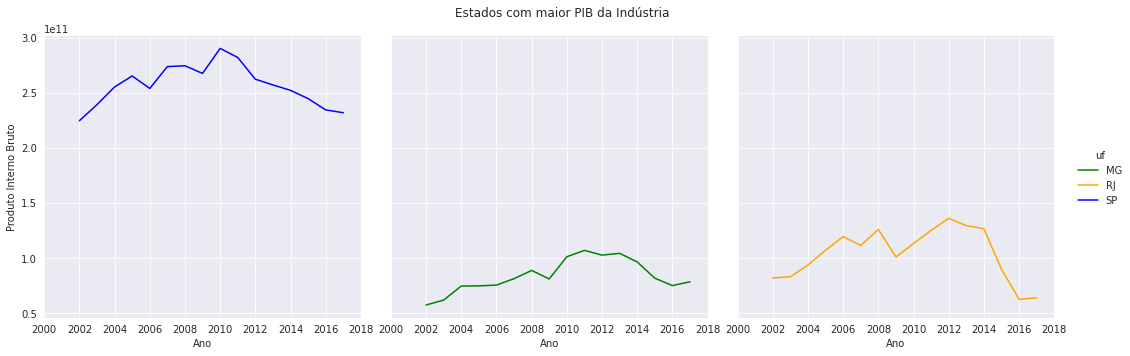

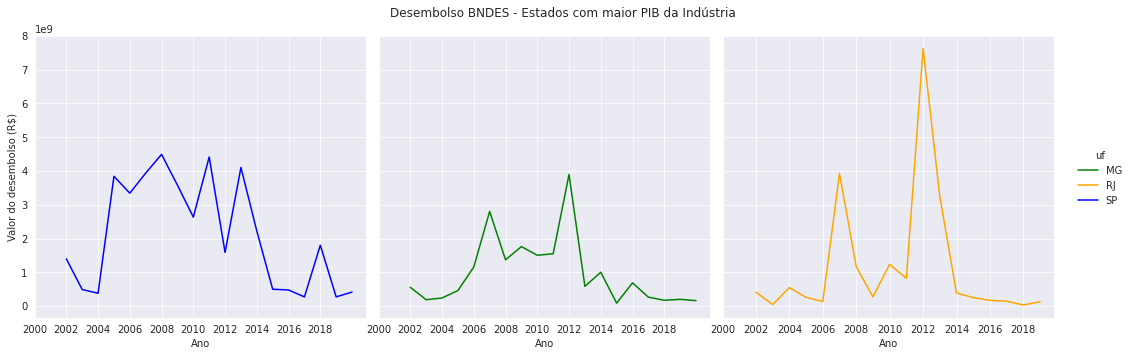

In [179]:
## PIB e desembolso Indústria SP/MG/RJ
plot = sns.relplot(
    data=ind_pib,
    x="ano", y="pib",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'MG', 'RJ'], palette=['g', 'orange', 'b']
)
(plot.set_axis_labels('Ano', 'Produto Interno Bruto')
 .set_titles('Estado: {col_name}')
 .tight_layout(w_pad=3))
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.set_titles('')
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Estados com maior PIB da Indústria')

plot = sns.relplot(
    data=ind_pib_des,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'MG', 'RJ'], palette=['g', 'orange', 'b']
)
(plot.set_axis_labels('Ano', 'Valor do desembolso (R$)')
 .set_titles('Estado: {col_name}')
 .tight_layout(w_pad=1)
 )
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.set_titles('')
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Desembolso BNDES - Estados com maior PIB da Indústria')


Text(0.5, 0.98, 'Emissão de CO2 - Estados com maior PIB da Agropecuária')

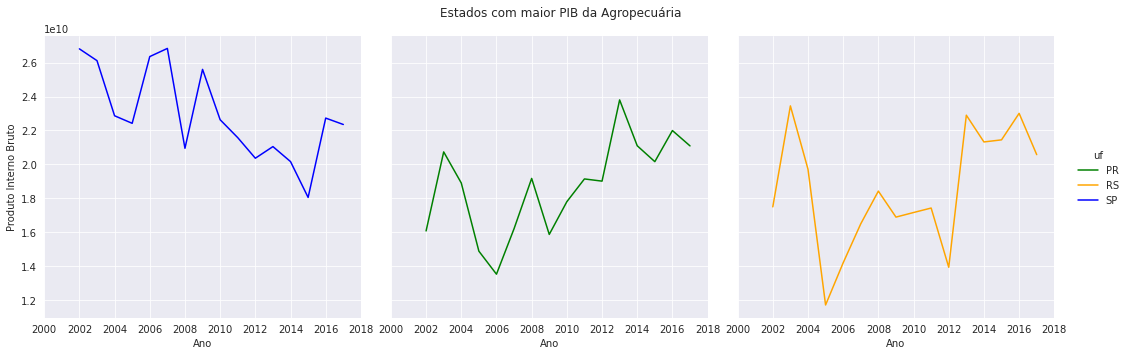

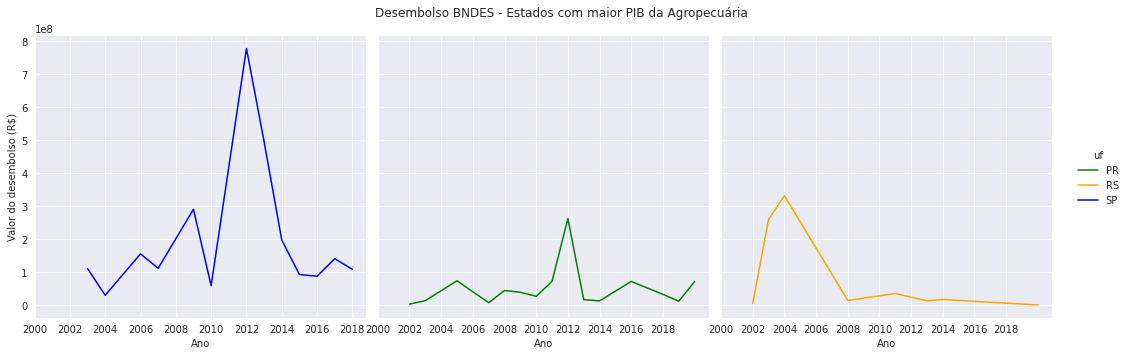

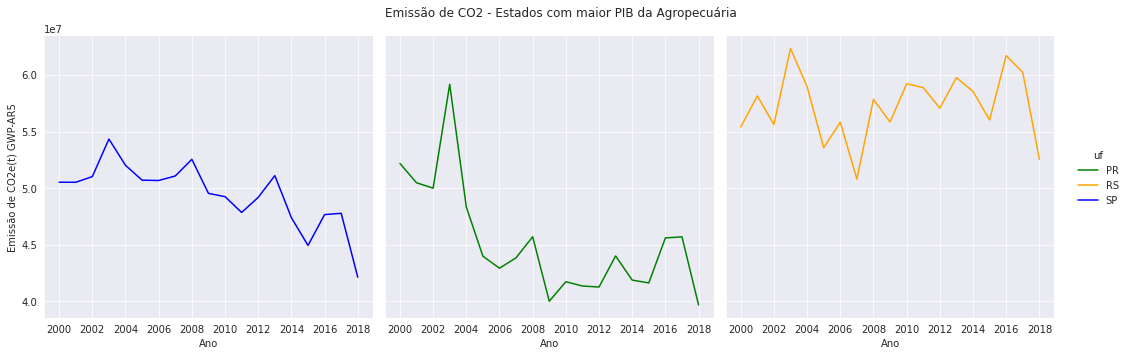

In [185]:
## PIB e desembolso Agropecuária PR/RS/SP
plot = sns.relplot(
    data=agro_pib,
    x="ano", y="pib",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'PR', 'RS'], palette=['g', 'orange', 'b']
)
(plot.set_axis_labels('Ano', 'Produto Interno Bruto')
 .set_titles('Estado: {col_name}')
 .tight_layout(w_pad=3))
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.set_titles('')
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Estados com maior PIB da Agropecuária')

plot = sns.relplot(
    data=agro_pib_des,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'PR', 'RS'], palette=['g', 'orange', 'b']
)
(plot.set_axis_labels('Ano', 'Valor do desembolso (R$)')
 .set_titles('Estado: {col_name}')
 .tight_layout(w_pad=1)
 )
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.set_titles('')
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Desembolso BNDES - Estados com maior PIB da Agropecuária')

t = seeg_agro.loc[(seeg_agro['uf'] == 'SP') | (
    seeg_agro['uf'] == 'PR') | (seeg_agro['uf'] == 'RS')]

plot = sns.relplot(
    data=t,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'PR', 'RS'], palette=['g', 'orange', 'b']
)
(plot.set_axis_labels('Ano', 'Emissão de CO2e(t) GWP-AR5')
 .set_titles('')
 .tight_layout(w_pad=1))
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Emissão de CO2 - Estados com maior PIB da Agropecuária')


Text(0.5, 0.98, 'Desembolso BNDES - Estados com maior quantidade de empregos da Indústria')

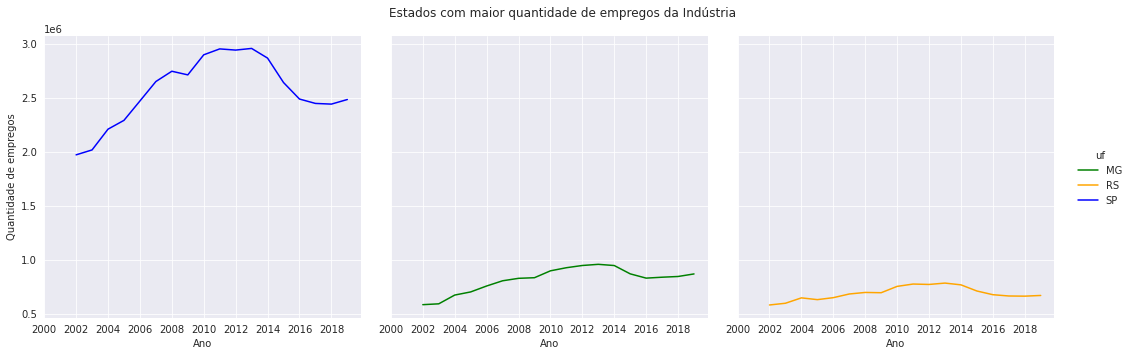

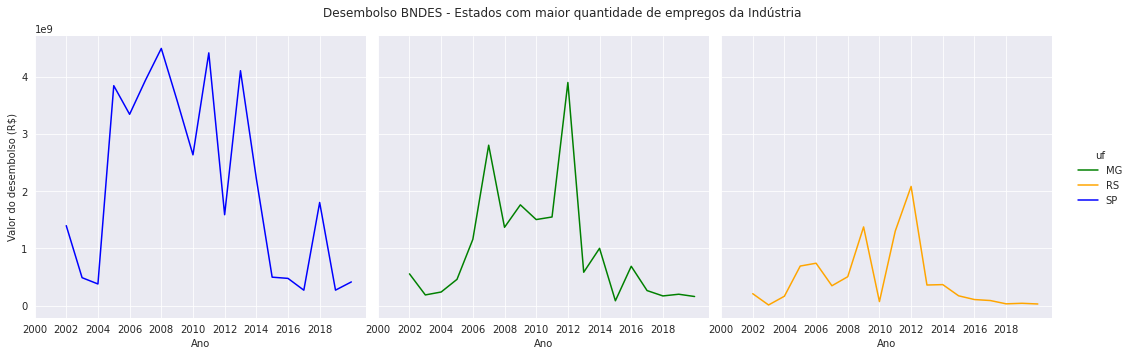

In [200]:
## Empregos e desembolso Indústria MG/RS/SP
plot = sns.relplot(
    data=ind_emp,
    x="ano", y="num_empregados",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'MG', 'RS'], palette=['g', 'orange', 'b']
)
(plot.set_axis_labels('Ano', 'Quantidade de empregos')
 .set_titles('')
 .tight_layout(w_pad=3))
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Estados com maior quantidade de empregos da Indústria')

plot = sns.relplot(
    data=ind_emp_des,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'MG', 'RS'], palette=['g', 'orange', 'b']
)
(plot.set_axis_labels('Ano', 'Valor do desembolso (R$)')
 .set_titles('')
 .tight_layout(w_pad=1)
 )
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle(
    'Desembolso BNDES - Estados com maior quantidade de empregos da Indústria')


Text(0.5, 0.98, 'Desembolso BNDES - Estados com maior quantidade de empregos da Agropecuária')

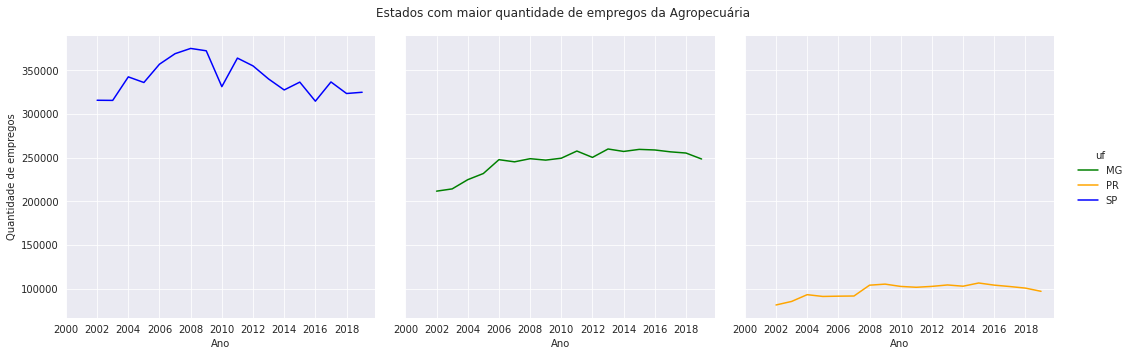

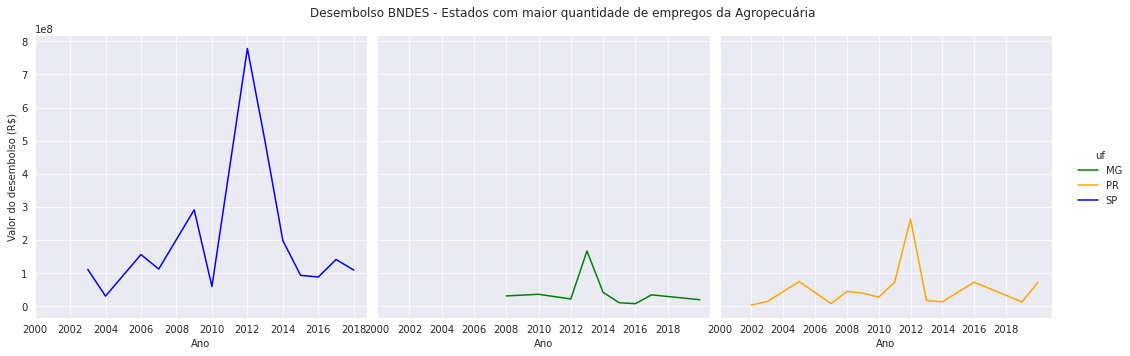

In [236]:
## Empregos e desembolso Agropecuária SP/MG/PR
plot = sns.relplot(
    data=agro_emp,
    x="ano", y="num_empregados",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'MG', 'PR'], palette=['g', 'orange', 'b']
)
(plot.set_axis_labels('Ano', 'Quantidade de empregos')
 .set_titles('')
 .tight_layout(w_pad=3))
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Estados com maior quantidade de empregos da Agropecuária')

plot = sns.relplot(
    data=agro_emp_des,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'MG', 'PR'], palette=['g', 'orange', 'b']
)
(plot.set_axis_labels('Ano', 'Valor do desembolso (R$)')
 .set_titles('')
 .tight_layout(w_pad=1)
 )
plot.set(xticks=[i for i in range(2000, 2020, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle(
    'Desembolso BNDES - Estados com maior quantidade de empregos da Agropecuária')


Text(0.5, 0.98, 'Desembolso BNDES - Estados com maior IDH')

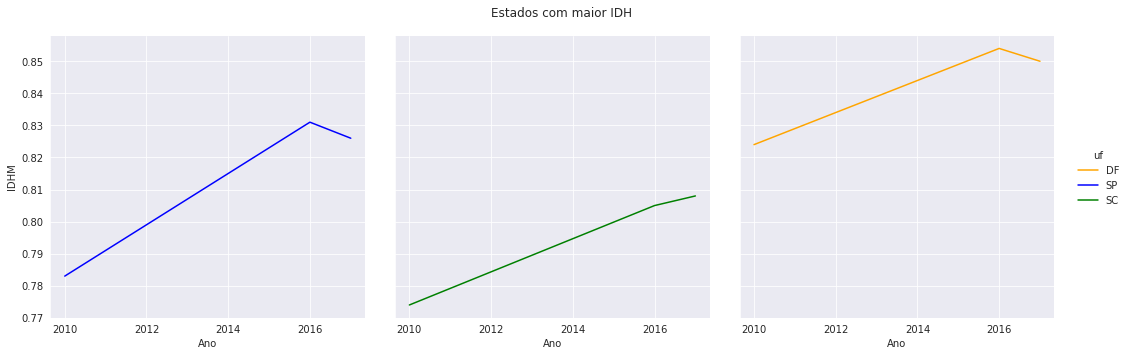

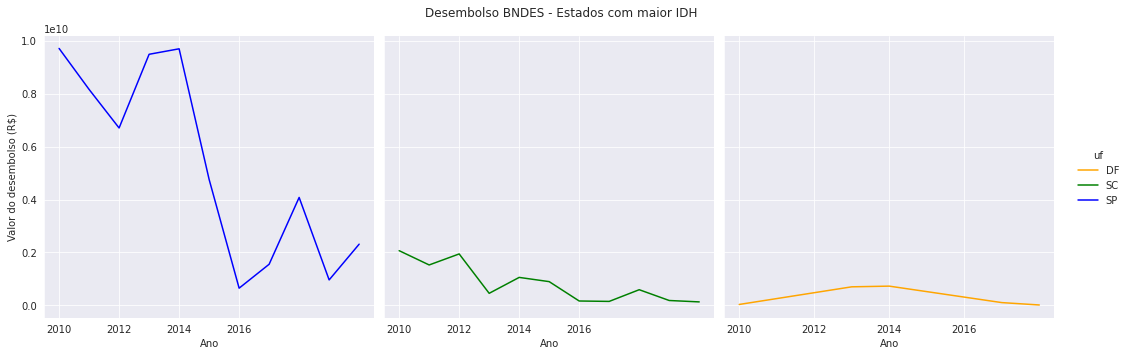

In [227]:
## IDH e desembolso Maiores estados DF/SC/SP
plot = sns.relplot(
    data=top_idh,
    x="ano", y="idhm",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'SC', 'DF'], palette=['orange', 'b', 'g']
)
(plot.set_axis_labels('Ano', 'IDHM')
 .set_titles('')
 .tight_layout(w_pad=3))
plot.set(xticks=[i for i in range(2010, 2017, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Estados com maior IDH')

plot = sns.relplot(
    data=top_idh_des,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['SP', 'SC', 'DF'], palette=['orange', 'g', 'b']
)
(plot.set_axis_labels('Ano', 'Valor do desembolso (R$)')
 .set_titles('')
 .tight_layout(w_pad=1)
 )
plot.set(xticks=[i for i in range(2010, 2017, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Desembolso BNDES - Estados com maior IDH')


Text(0.5, 0.98, 'Desembolso BNDES - Estados com menor IDH')

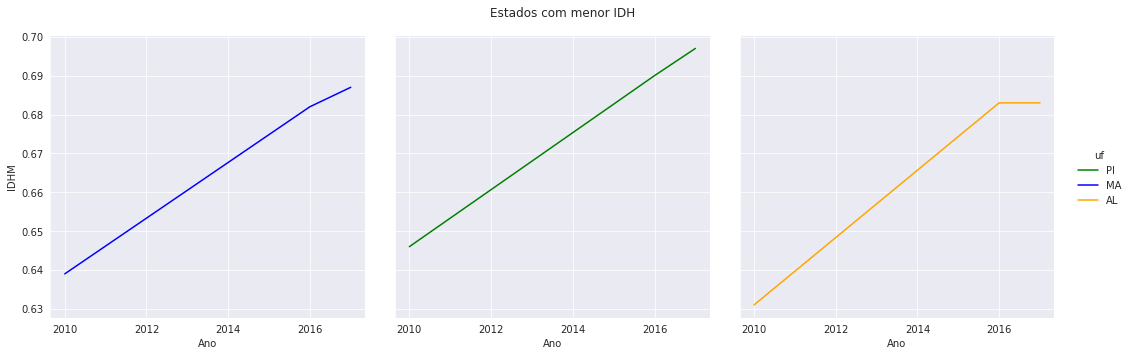

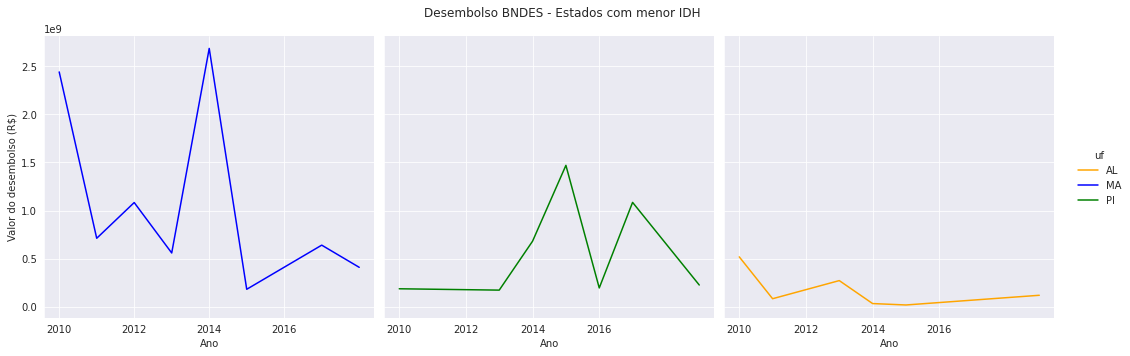

In [235]:
## IDH e desembolso Maiores estados MA/PI/AL
plot = sns.relplot(
    data=small_idh,
    x="ano", y="idhm",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['MA', 'PI', 'AL'], palette=['g', 'b', 'orange']
)
(plot.set_axis_labels('Ano', 'IDHM')
 .set_titles('')
 .tight_layout(w_pad=3))
plot.set(xticks=[i for i in range(2010, 2017, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Estados com menor IDH')

plot = sns.relplot(
    data=small_idh_des,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
    col_order=['MA', 'PI', 'AL'], palette=['orange', 'b', 'g']
)
(plot.set_axis_labels('Ano', 'Valor do desembolso (R$)')
 .set_titles('')
 .tight_layout(w_pad=1)
 )
plot.set(xticks=[i for i in range(2010, 2017, 2)])
plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
plot.fig.suptitle('Desembolso BNDES - Estados com menor IDH')
